In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [3]:
tf.__version__

'2.9.0'

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

In [8]:
X = iris.data[:, :3] #속성 3개
y = iris.data[:, 3] #petal_width
X.shape, y.shape

((150, 3), (150,))

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(3,))) #input_shape(3,)는 입력층이 3개인것을 뜻함
model.add(keras.layers.Dense(10, activation='relu'))
model.add(keras.layers.Dense(1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               400       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse', optimizer='adam')

In [12]:
history = model.fit(X, y , epochs=50, batch_size=32)

Epoch 1/50
5/5 [==============================] - 0s 1ms/step - loss: 2.7841
Epoch 2/50
5/5 [==============================] - 0s 1ms/step - loss: 0.9252
Epoch 3/50
5/5 [==============================] - 0s 1ms/step - loss: 0.4305
Epoch 4/50
5/5 [==============================] - 0s 997us/step - loss: 0.2989
Epoch 5/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2525
Epoch 6/50
5/5 [==============================] - 0s 1ms/step - loss: 0.2441
Epoch 7/50
5/5 [==============================] - 0s 997us/step - loss: 0.2487
Epoch 8/50
5/5 [==============================] - 0s 997us/step - loss: 0.2255
Epoch 9/50
5/5 [==============================] - 0s 997us/step - loss: 0.2020
Epoch 10/50
5/5 [==============================] - 0s 997us/step - loss: 0.1813
Epoch 11/50
5/5 [==============================] - 0s 999us/step - loss: 0.1662
Epoch 12/50
5/5 [==============================] - 0s 997us/step - loss: 0.1519
Epoch 13/50
5/5 [==============================] - 0s 748us

In [13]:
y_pred = model.predict(X)

5/5 [==============================] - 0s 748us/step


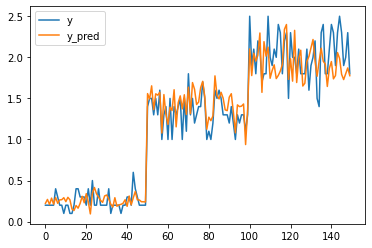

In [16]:
plt.plot(y)
plt.plot(y_pred)
plt.legend(['y','y_pred'])

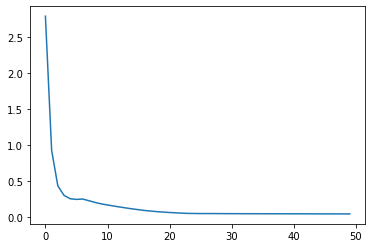

In [15]:
plt.plot(history.history['loss'])

In [17]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [18]:
X_train.max(), X_train.min()

(255, 0)

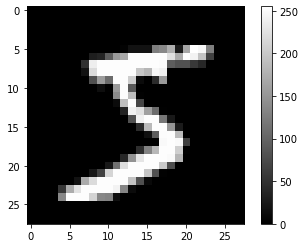

In [19]:
plt.imshow(X_train[0], cmap='gray')
plt.colorbar()

In [20]:
#데이터 전처리
X_train = X_train.reshape(-1, 28*28)/255
X_test = X_test.reshape(-1, 28*28)/255
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [21]:
#원핫인코딩
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation='relu', input_shape=(784,))) #input_shape(3,)는 입력층이 784(픽셀수)개인것을 뜻함
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) #10개 클래스로 분류 ->softmax

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [25]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.25)

Epoch 1/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.2884 - acc: 0.9151 - val_loss: 0.1750 - val_acc: 0.9465
Epoch 2/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.1250 - acc: 0.9621 - val_loss: 0.1327 - val_acc: 0.9602
Epoch 3/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0886 - acc: 0.9728 - val_loss: 0.1126 - val_acc: 0.9677
Epoch 4/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0664 - acc: 0.9795 - val_loss: 0.1008 - val_acc: 0.9707
Epoch 5/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0515 - acc: 0.9840 - val_loss: 0.1167 - val_acc: 0.9663
Epoch 6/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0418 - acc: 0.9873 - val_loss: 0.1150 - val_acc: 0.9679
Epoch 7/20
1407/1407 [==============================] - 2s 1ms/step - loss: 0.0335 - acc: 0.9893 - val_loss: 0.1237 - val_acc: 0.9681
Epoch 8/20
1407/1407 [==============================] - 2s 1ms

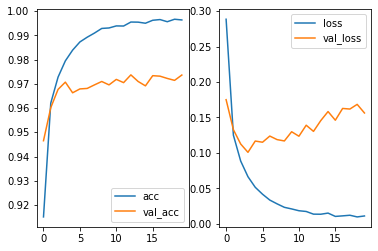

In [38]:
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [39]:
y_pred = model.predict(X_test)
y_pred.shape

313/313 [==============================] - 0s 689us/step


(10000, 10)

In [40]:
y_pred[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)

In [41]:
y_test[:20].argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4],
      dtype=int64)